# Task 4.9 - Python Visualizations Part 2

### Table of Contents

1. Importing libraries and data
2. Creating charts & graphs (learning this in Python)
3. Visualizing orders by hour of day
4. Visualizing customer "loyalty"
5. Visualizing average prices by hour of day they were purchased
6. Exploring demographics

#### 1. Importing libraries and data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data

# identifying project path
project =r'D:\Adam\Employment\Data Analysis Course\Python Instacart project'

# Import Instacart prepared orders data
df = pd.read_pickle(os.path.join(project, '02 Data', 'Prepared Data', 'ic_merged.pkl'))

In [66]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_item_price', 'spender_type', 'avg_days_since_last_order',
       'order_frequency', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'dow'],
      dtype='object')

#### 2. Creating charts & graphs

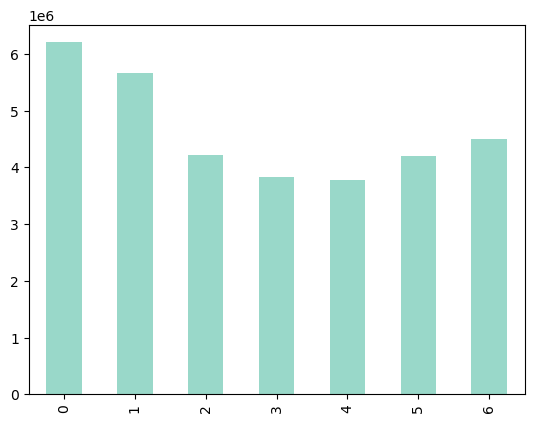

In [3]:
# Creating a bar chart for most popular orders by day of the week sorted by index order

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = '#99d8c9')

In [14]:
# making new column with actual days of the week so the bar chart looks much better/understandable

df.loc[df['orders_day_of_week'] == 0, 'dow'] = 'Sat'

In [15]:
df.loc[df['orders_day_of_week'] == 1, 'dow'] = 'Sun'

In [16]:
df.loc[df['orders_day_of_week'] == 2, 'dow'] = 'Mon'

In [17]:
df.loc[df['orders_day_of_week'] == 3, 'dow'] = 'Tues'

In [18]:
df.loc[df['orders_day_of_week'] == 4, 'dow'] = 'Wed'

In [19]:
df.loc[df['orders_day_of_week'] == 5, 'dow'] = 'Thurs'

In [20]:
df.loc[df['orders_day_of_week'] == 6, 'dow'] = 'Fri'

In [23]:
df.loc[:, ['orders_day_of_week', 'dow']].head(30)

,orders_day_of_week,dow
0,2,Mon
1,3,Tues
2,3,Tues
3,4,Wed
4,4,Wed
5,2,Mon
6,1,Sun
7,1,Sun
8,1,Sun
9,4,Wed


Text(0.5, 1.0, 'Instacart Orders Placed By Day of Week')

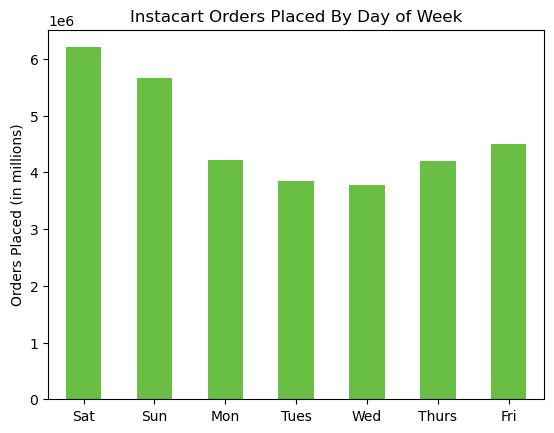

In [60]:
# creating bar chart with days of the week listed in original order 
# (custom index is put in double brackets after value_counts())
# also adding labels and otherwise tweaking the graph to look better

bar = df['dow'].value_counts()[['Sat','Sun','Mon', 'Tues', 'Wed','Thurs','Fri']].plot.bar(color = '#68bf43', rot=0)
plt.ylabel("Orders Placed (in millions)")
plt.title ("Instacart Orders Placed By Day of Week")

In [61]:
# exporting bar chart

bar.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [3]:
# preparing data for histogram (because too many outlier values)
# making prices above $100 become missing values (NaN)

df.loc[df['prices'] >100, 'prices'] = np.nan

In [4]:
df['prices'].max()

25.0

Text(0.5, 1.0, 'Frequency of Instacart products purchased by price')

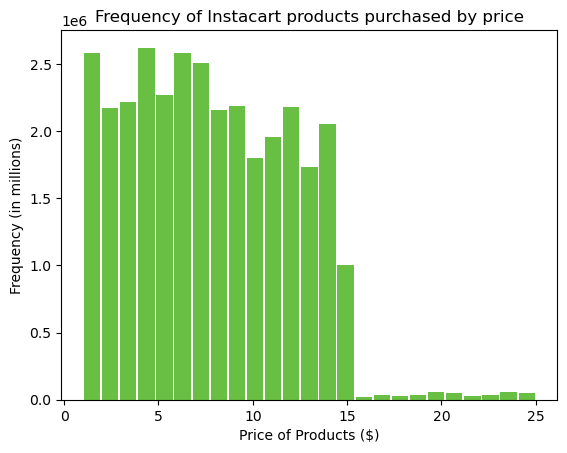

In [63]:
# creating histogram

hist = df['prices'].plot.hist(bins = 25, color = '#68bf43', rwidth=0.9)

plt.xlabel("Price of Products ($)")
plt.ylabel("Frequency (in millions)")
plt.title("Frequency of Instacart products purchased by price")

In [64]:
# exporting histogram

hist.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'hist_products_price.png'))

In [73]:
df['department_id'].describe()

count    3.240486e+07
mean     9.919792e+00
std      6.281485e+00
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.600000e+01
max      2.100000e+01
Name: department_id, dtype: float64

([<matplotlib.axis.YTick at 0x1cae5961940>,
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5'),
  Text(0, 0, ''),
  Text(0, 0, '')])

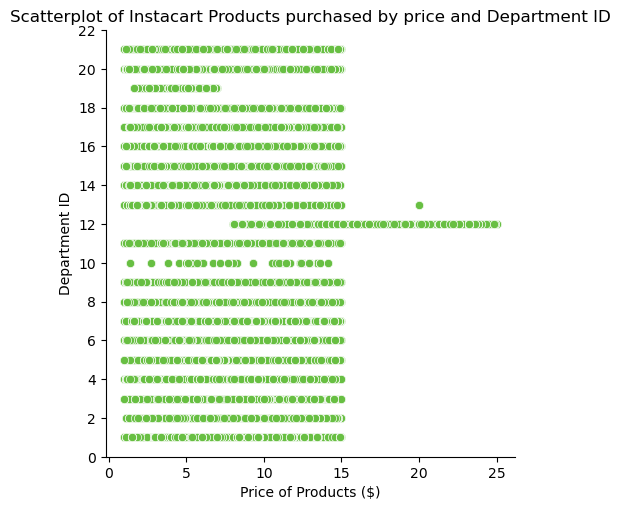

In [75]:
# scatterplot of product prices by department from orders purchased (after already removing outliers)

scatter = sns.relplot(x='prices', y='department_id', data = df, kind = 'scatter', color='#68bf43')
plt.xlabel("Price of Products ($)")
plt.ylabel("Department ID")
plt.title("Scatterplot of Instacart Products purchased by price and Department ID")
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22])

In [80]:
# exporting scatterplot

scatter.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'scatter_price_department.png'), bbox_inches='tight')

In [81]:
# creating random sample of data to use for computing various charts

# creating list of 70% of values
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [82]:
# splitting dataframe into big and large samples

big = df[dev]
# everything that's *not in 'dev' list
small = df[~dev]

In [84]:
# making small data frame with just columns including data I'll make into line graphs

df_small = small[['orders_day_of_week', 'dow', 'order_hour_of_day', 'prices']]

([<matplotlib.axis.XTick at 0x1cae6c694f0>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tues'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thurs'),
  Text(6, 0, 'Fri')])

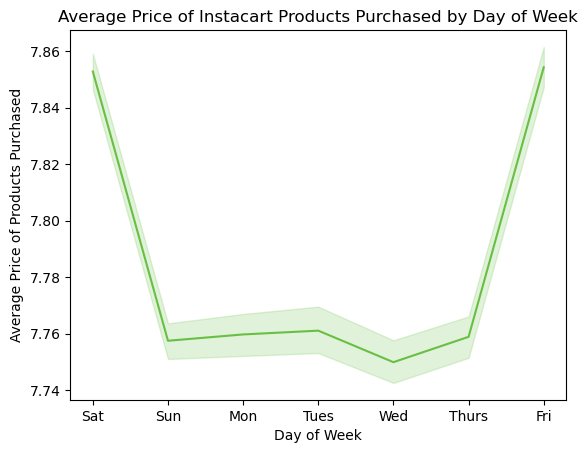

In [85]:
# creating line chart of average prices of products purchased by day of week

line = sns.lineplot(data = df_small, x = 'orders_day_of_week', y = 'prices', color='#68bf43')
plt.xlabel("Day of Week")
plt.ylabel("Average Price of Products Purchased")
plt.title("Average Price of Instacart Products Purchased by Day of Week")
# specifying where to have ticks on x axis, and giving them a custom label
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon','Tues','Wed','Thurs','Fri'])

In [86]:
# exporting line graph

line.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'line_price_dow.png'), bbox_inches='tight')

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

Text(0.5, 1.0, 'Frequency of Instacart Orders Placed by Hour of Day')

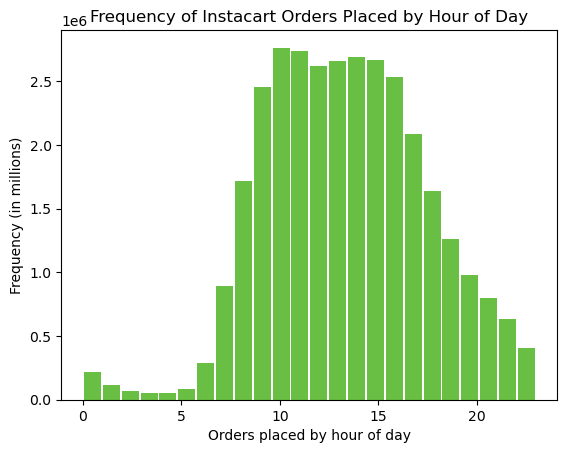

In [87]:
# creating histogram

hist = df['order_hour_of_day'].plot.hist(bins = 24, color = '#68bf43', rwidth=0.9)

plt.xlabel("Orders placed by hour of day")
plt.ylabel("Frequency (in millions)")
plt.title("Frequency of Instacart Orders Placed by Hour of Day")

In [107]:
# This shows that people don't place many orders during the times of day when most people are sleeping.
# Instead most people start to place more orders in the mid-morning with most orders happening between 9am and 4pm
# and it has a steady downslope of less orders from 4pm until midnight

In [88]:
# exporting histogram

hist.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'hist_orders_hour_of_day.png'))

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

([<matplotlib.axis.XTick at 0x1705754f820>,
 [Text(0, 0, 'Newer customer\n(<10 orders)'),
  Text(1, 0, 'Regular customer\n(10-40 orders)'),
  Text(2, 0, 'Loyal customer\n(>40 orders)')])

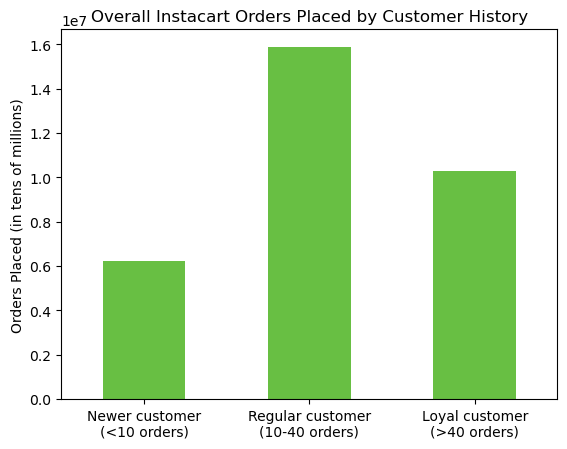

In [81]:
# Create bar chart of instacart orders placed by each category of customer history ("loyalty")

# rot = # changes rotation of bottom axis labels so they fit
bar2 = df['loyalty_flag'].value_counts()[['Newer customer','Regular customer','Loyal customer']].plot.bar(color = '#68bf43', rot=0)
plt.ylabel("Orders Placed (in tens of millions)")
plt.title ("Overall Instacart Orders Placed by Customer History")
# identifying new names (descriptions) for each category... 
# though the categories are string values, I identify them with number values
plt.xticks([0, 1, 2],['Newer customer\n(<10 orders)', 'Regular customer\n(10-40 orders)', 'Loyal customer\n(>40 orders)'])

In [82]:
# exporting bar chart

bar2.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_orders_customer_loyalty.png'))

([<matplotlib.axis.XTick at 0x17057047fd0>,
 [Text(0, 0, 'Newer customer\n(<10 orders)'),
  Text(1, 0, 'Regular customer\n(10-40 orders)'),
  Text(2, 0, 'Loyal customer\n(>40 orders)')])

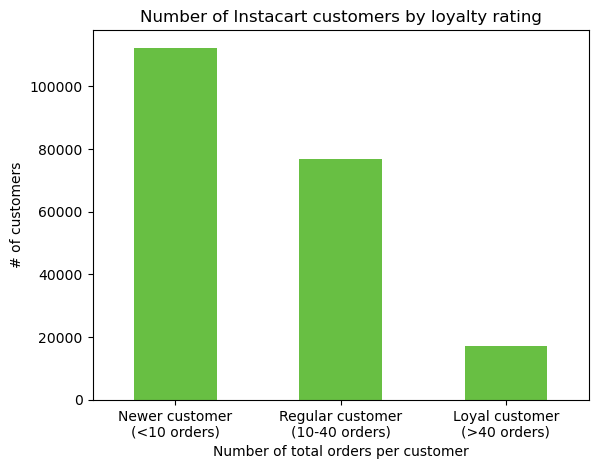

In [78]:
bar4 = df.groupby('loyalty_flag', sort=False)['user_id'].nunique()
bar4graph = bar4.plot.bar(color = '#68bf43', rot=0)
plt.ylabel("# of customers")
plt.xlabel("Number of total orders per customer")
plt.title ("Number of Instacart customers by loyalty rating")
plt.xticks([0, 1, 2],['Newer customer\n(<10 orders)', 'Regular customer\n(10-40 orders)', 'Loyal customer\n(>40 orders)'])

In [75]:
df['user_id'].nunique()

206209

In [80]:
# exporting bar chart

bar4graph.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'), bbox_inches='tight')

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

Text(0.5, 1.0, 'Average Price of Instacart Products Purchased by Hour of Day')

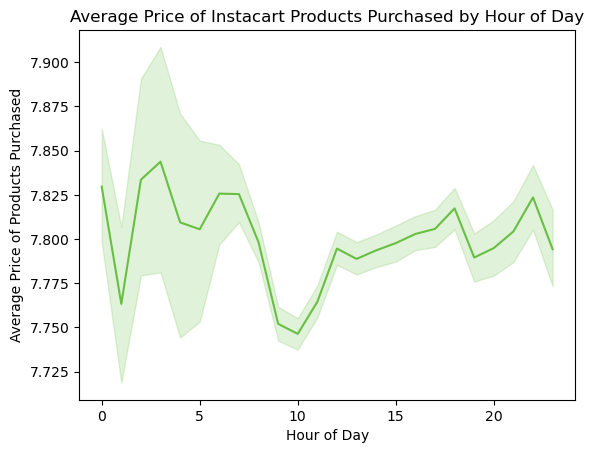

In [106]:
# creating line chart of average prices of products purchased by hour of day

line = sns.lineplot(data = df_small, x = 'order_hour_of_day', y = 'prices', color='#68bf43')
plt.xlabel("Hour of Day")
plt.ylabel("Average Price of Products Purchased")
plt.title("Average Price of Instacart Products Purchased by Hour of Day")

In [108]:
# The range of average price differences here is so small it's practically meaningless 
# (i.e. does $.10 difference in average price really matter?)
# however, if we thought these price differences matter, then mid-morning has the cheapest stuff purchased
# and later evening and early morning has the most expensive stuff purchased

In [110]:
# exporting line chart

line.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'line_avg_prices_hour_of_day.png'))

#### 6. Demographic Explorations

In [111]:
# determine whether there’s a connection between age and family situation by creating 
# a line chart exploring the connections between age and number of dependents

In [113]:
# making small dataframe with just columns including data I'll make into line graphs for this section

df_small_demo = small[['age','n_dependants','fam_status']]

Text(0.5, 1.0, 'Average # of Dependants by Instacart Customer Age')

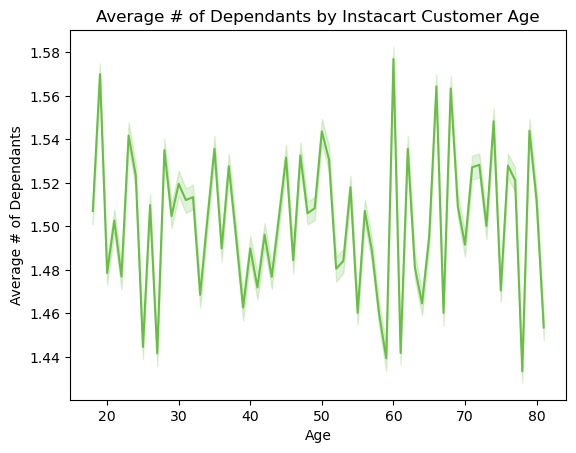

In [114]:
# creating line chart comparing age to number of dependents

line = sns.lineplot(data = df_small_demo, x = 'age', y = 'n_dependants', color='#68bf43')
plt.xlabel("Age")
plt.ylabel("Average # of Dependants")
plt.title("Average # of Dependants by Instacart Customer Age")

In [115]:
# just like the previous line chart, this "average age of dependants" varies so little from one age to the next
# that it's practically meaningless.  Let's be honest, it shows people in their 60s - 80s with roughly the same
# number of dependants as middle-aged or younger people.  So more than likely the data itself is just fabricated
# to produce a certain average.  That was also clear in part 1 of this when I observed that the max # of dependants
# was just 3. And the numbers 0-3 were practically the same.  So clearly they just randomly distributed those numbers
# equally to all of their customers regardless of age.  Now it makes me want to do a histogram of age to see if they've
# done that the fake way too

In [118]:
# exporting line chart

line.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'line_avg_dependants_age.png'))

Text(0.5, 1.0, 'Instacart Customers by Age')

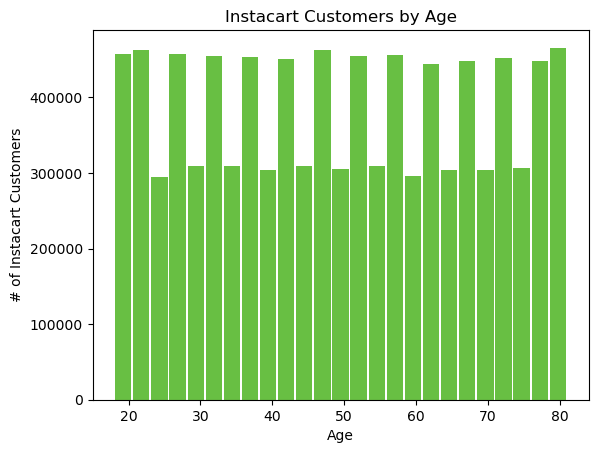

In [123]:
# creating histogram of customer age to see if it follows real-life patterns or if it's all uniform

hist = df_small_demo['age'].plot.hist(bins = 25, color = '#68bf43', rwidth=0.9)
plt.xlabel("Age")
plt.ylabel("# of Instacart Customers")
plt.title("Instacart Customers by Age")

In [117]:
# yep - fake data all the way around. This is way too uniform to be real.
# You definitely wouldn't have as many 80-yr-olds using instacart as you would younger ages
# None of the demographics is real, I'm sure, so they can't provide any insight

In [124]:
# exporting histogram

hist.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'histogram_age.png'), bbox_inches='tight')

In [7]:
# exporting scatterplot

scatter3.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'scatter_age_famstatus.png'), bbox_inches='tight')

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income)

Text(0.5, 1.0, 'Scatterplot of Instacart Customer Age and Spending Power')

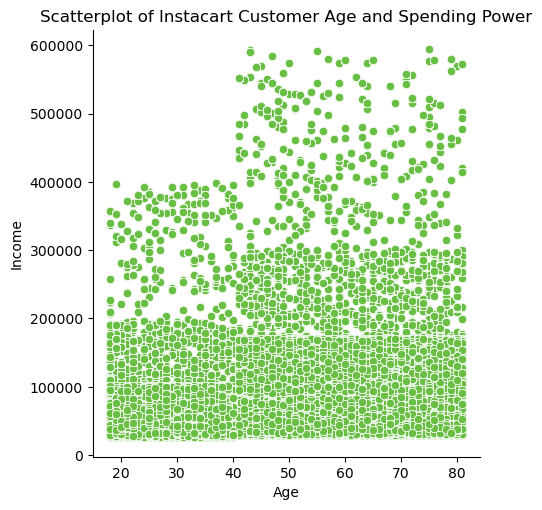

In [119]:
# To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

scatter2 = sns.relplot(x='age', y='income', data = df, kind = 'scatter', color='#68bf43')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatterplot of Instacart Customer Age and Spending Power")

In [120]:
# It's hard to be sure, but I still generally find this unlikely to be realistic.
# Again, just because I don't think there can be as many Instacart customers >60 yrs of age as there are in other age ranges
# Greater income possibilities when you get older is likely, but even then, I'm not sure if this distribution could
# be considered accurate or not.
# With all that in mind, I think it's likely impossible to draw any real 'insights' from any of this data.

In [121]:
# exporting scatterplot

scatter2.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'), bbox_inches='tight')

([<matplotlib.axis.XTick at 0x170514b45e0>,
 [Text(0, 0, 'Low-range product\n(<$5)'),
  Text(1, 0, 'Mid-range product\n($5 - 15)'),
  Text(2, 0, 'High-range product\n(>$15)')])

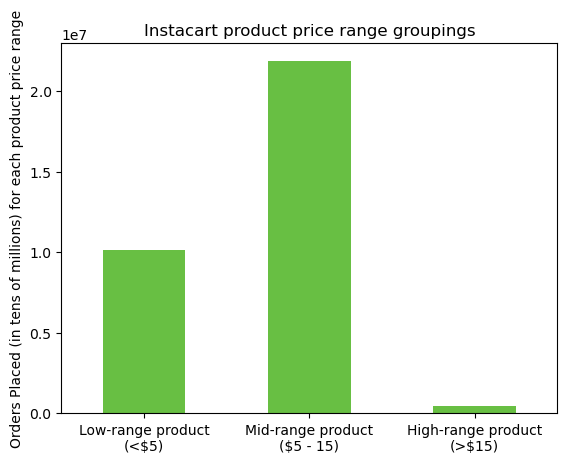

In [67]:
# creating bar plot of price_range

bar = df['price_range_loc'].value_counts()[['Low-range product','Mid-range product','High-range product']].plot.bar(color = '#68bf43', rot=0)
plt.ylabel("Orders Placed (in tens of millions) for each product price range")
plt.title ("Instacart product price range groupings")
plt.xticks([0,1,2],['Low-range product\n(<$5)', 'Mid-range product\n($5 - 15)', 'High-range product\n(>$15)'])

In [68]:
# exporting bar graph

bar.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_product_price_range.png'), bbox_inches='tight')

([<matplotlib.axis.YTick at 0x17049965130>,
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5'),
  Text(0, 0, ''),
  Text(0, 0, '')])

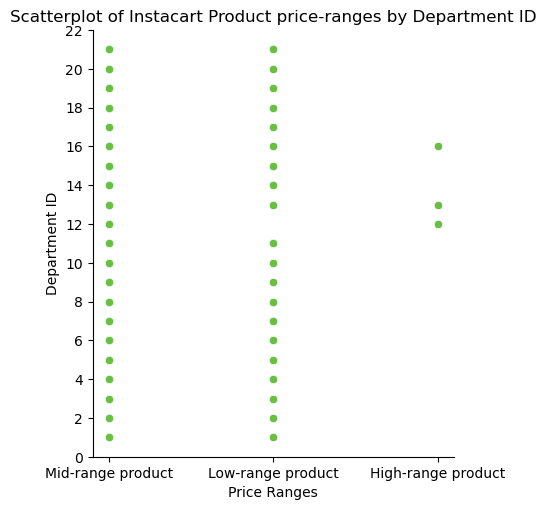

In [23]:
# scatterplot of product price ranges by department from orders purchased (after already removing outliers)

scatter = sns.relplot(x='price_range_loc', y='department_id', data = df, kind = 'scatter', color='#68bf43')
plt.xlabel("Price Ranges")
plt.ylabel("Department ID")
plt.title("Scatterplot of Instacart Product price-ranges by Department ID")
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22])

In [59]:
# exporting scatterplot

scatter.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'scatter_deptID_price_range.png'), bbox_inches='tight')

In [31]:
# making a stacked bar chart of price ranges to plot against dept ID

# starting by making pivot table so I can plug it into stacked bar chart

pivot_df = df.pivot_table(index='department_id', values='user_id', columns='price_range_loc', aggfunc='count')

In [32]:
pivot_df.head(30)

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,NaN,681412.0,1553331.0
2,NaN,15972.0,20319.0
3,NaN,287938.0,884490.0
4,NaN,2697883.0,6781408.0
5,NaN,35243.0,118453.0
6,NaN,76974.0,192279.0
7,NaN,852974.0,1835149.0
8,NaN,29551.0,68165.0
9,NaN,299327.0,567300.0


([<matplotlib.axis.XTick at 0x1705091ae80>,
 [Text(0, 0, 'frozen'),
  Text(1, 0, 'other'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'produce'),
  Text(4, 0, 'alcohol'),
  Text(5, 0, 'international'),
  Text(6, 0, 'beverages'),
  Text(7, 0, 'pets'),
  Text(8, 0, 'dry goods\npasta'),
  Text(9, 0, 'bulk'),
  Text(10, 0, 'personal care'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'pantry'),
  Text(13, 0, 'breakfast'),
  Text(14, 0, 'canned goods'),
  Text(15, 0, 'dairy eggs'),
  Text(16, 0, 'household'),
  Text(17, 0, 'babies'),
  Text(18, 0, 'snacks'),
  Text(19, 0, 'deli'),
  Text(20, 0, 'missing')])

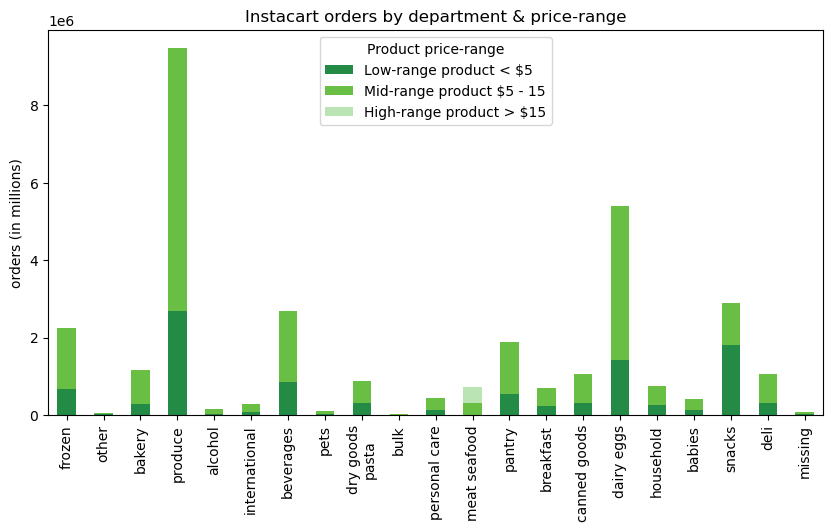

In [57]:
# creating stacked bar chart comparing product price ranges to department id

bar_dept_pricerange = pivot_df.loc[:,['Low-range product', 'Mid-range product', 'High-range product']].plot.bar(stacked=True, color=['#238b45','#68bf43','#bae4b3'], rot=90, figsize=(10,5)).legend(['Low-range product < $5','Mid-range product $5 - 15', 'High-range product > $15'], loc='upper center', title='Product price-range')
plt.xlabel("")
plt.ylabel("orders (in millions)")
plt.title ("Instacart orders by department & price-range")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods\npasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'])

In [60]:
# exporting bar graph

bar_dept_pricerange.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_dept_pricerange.png'), bbox_inches='tight')